<a href="https://colab.research.google.com/github/Jatingpt/Hacka/blob/main/git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/HCKT EPM in the Cloud Quick Poll_Case Study.xlsx"
df = pd.read_excel(file_path)
df.head(3)

,ResponseID,Q1 How important were/are each of these factors when contemplating a cloud solution for EPM?-Cost of ownership,Q1 How important were/are each of these factors when contemplating a cloud solution for EPM?-Functionality and features,Q1 How important were/are each of these factors when contemplating a cloud solution for EPM?-Application management,Q1 How important were/are each of these factors when contemplating a cloud solution for EPM?-IT strategic direction,"Q2 For the processes you have deployed/are considering deploying in the cloud, how do you believe...-Planning, budgeting and forecasting","Q2 For the processes you have deployed/are considering deploying in the cloud, how do you believe...-Performance reporting & analysis","Q2 For the processes you have deployed/are considering deploying in the cloud, how do you believe...-Financial consolidation","Q2 For the processes you have deployed/are considering deploying in the cloud, how do you believe...-Scorecarding and dashboarding","Q2 For the processes you have deployed/are considering deploying in the cloud, how do you believe...-Advanced modeling",...,Q8 To what degree has your cloud deployment impacted each of the following?-Agility of the function,Q8 To what degree has your cloud deployment impacted each of the following?-Cost,Q8 To what degree has your cloud deployment impacted each of the following?-Productivity,Q8 To what degree has your cloud deployment impacted each of the following?-User experience,Q8 To what degree has your cloud deployment impacted each of the following?-Leveraging financial and non-financial data for better decision-making,Q8 To what degree has your cloud deployment impacted each of the following?-Risk management,Q9 Which of the following best characterizes your current ERP landscape?,Q10 Which of the following best characterizes your ERP landscape in next 2 years?,Q11 Who is the primary administrator of your EPM solution(s)?,"You have now reached the end of this study. If you click ""YES"" and advance to the next page, your..."
0,R_r7PzgaLFKiiKJlT,High importance,Critical importance,Critical importance,High importance,Major variations/Unique and differentiated needs,Major variations/Unique and differentiated needs,Major variations/Unique and differentiated needs,Major variations/Unique and differentiated needs,Major variations/Unique and differentiated needs,...,Minimal impact,Minimal impact,Minimal impact,Minimal impact,Minimal impact,Minimal impact,Multiple ERPs,Hybrid ERP throughout company but multiple ins...,Finance,Yes
1,R_2QVTctdaWgx1ejz,High importance,Moderate importance,High importance,High importance,Moderate variations and/or some business units...,Minor variations,Minor variations,Minor variations,Moderate variations and/or some business units...,...,NaN,NaN,NaN,NaN,NaN,NaN,Hybrid ERP throughout company but multiple ins...,Hybrid ERP throughout company but multiple ins...,Shared services/center of expertise,Yes
2,R_33pNHIwVwgaKgys,High importance,Critical importance,High importance,High importance,Major variations/Unique and differentiated needs,Moderate variations and/or some business units...,Moderate variations and/or some business units...,Moderate variations and/or some business units...,Major variations/Unique and differentiated needs,...,Large and critical impact,Moderate impact,Large and critical impact,Minimal impact,Large and critical impact,Moderate impact,"Single ERP throughout company, but multiple in...",Single cloud-based ERP throughout company but ...,IT,Yes


In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()  #if we have any numeric values

object    112
Name: count, dtype: int64
Missing Values Report:
 ResponseID                                                                                                                                  0
Q1 How important were/are each of these factors when contemplating a cloud solution for EPM?-Cost of ownership                              0
Q1 How important were/are each of these factors when contemplating a cloud solution for EPM?-Functionality and features                     0
Q1 How important were/are each of these factors when contemplating a cloud solution for EPM?-Application management                         0
Q1 How important were/are each of these factors when contemplating a cloud solution for EPM?-IT strategic direction                         0
Q2 For the processes you have deployed/are considering deploying in the cloud, how do you believe...-Planning, budgeting and forecasting    0
Q2 For the processes you have deployed/are considering deploying in the cloud, how d

/tmp/ipython-input-2-2501792846.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_imp, y='Importance', order=df_imp['Importance'].value_counts().index, palette='Set2')


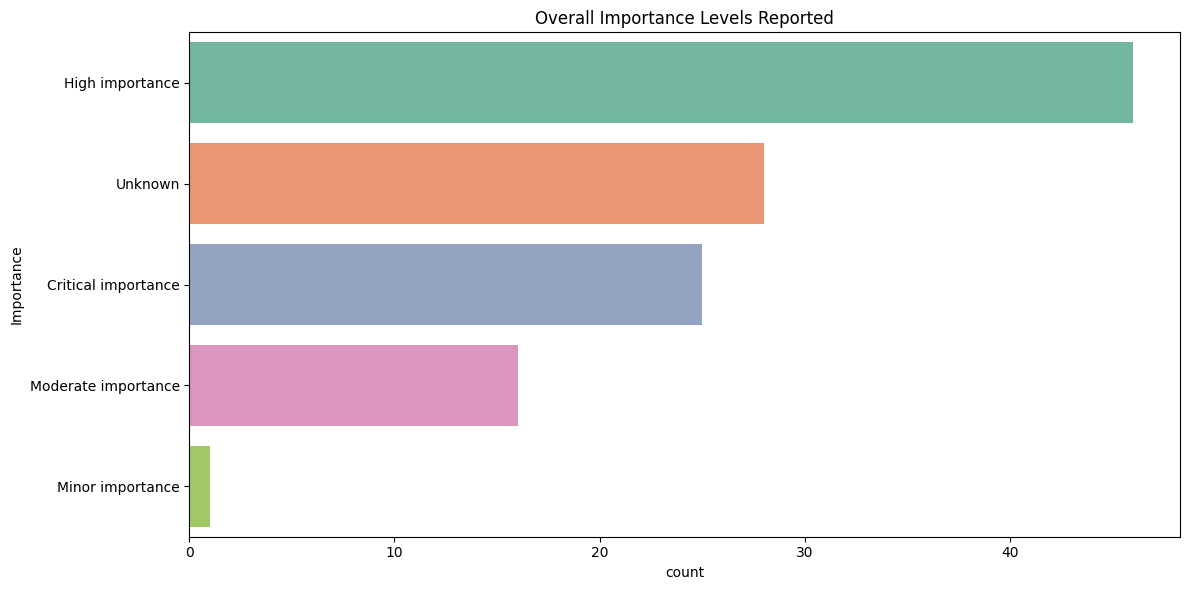

/tmp/ipython-input-2-2501792846.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_impact, x='Impact Level', order=df_impact['Impact Level'].value_counts().index, palette='coolwarm')


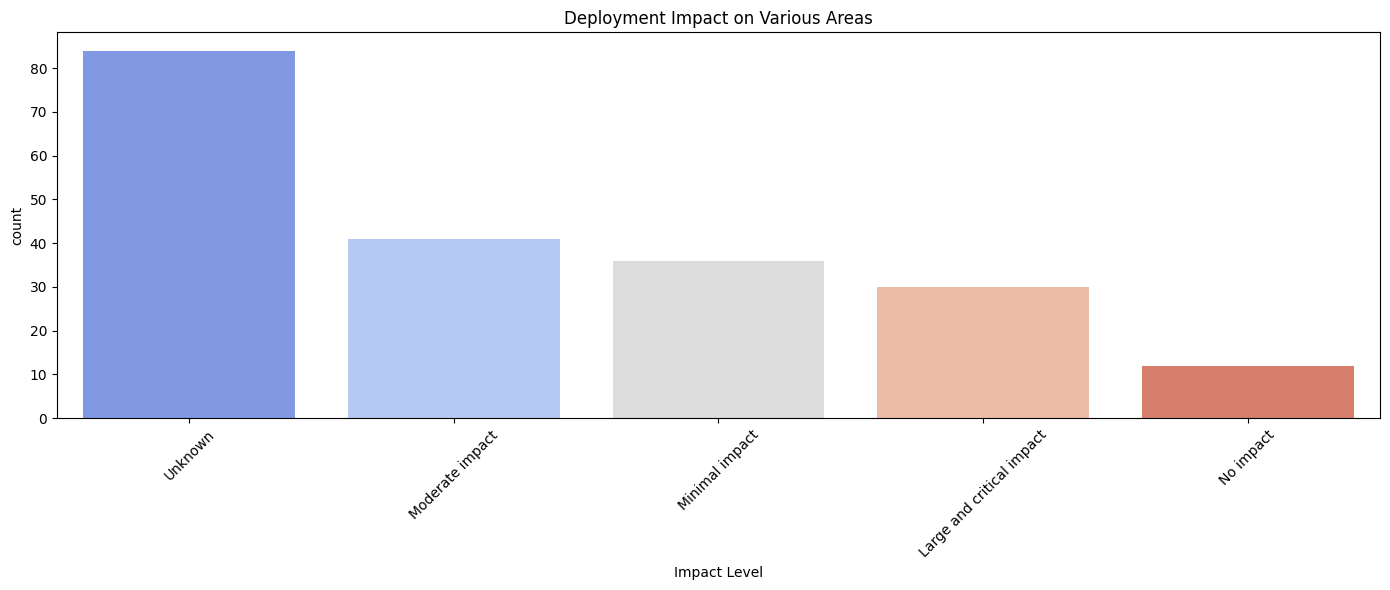

❌ Scope or Deployment Time column not found. Please check column names manually.


In [2]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset
#use your own method to import the data otherwise i am uploading the data using this code below

file_path = '/content/drive/MyDrive/Copy of Hotel Bookings.csv'
df = pd.read_csv(file_path)
df

# 3. Drop 100% missing columns
df_clean = df.dropna(axis=1, how='all')

# 4. Fill NA values (categorical: 'Unknown')
df_clean = df_clean.fillna("Unknown")

# 5. Data Type Summary
print(df_clean.dtypes.value_counts())

# 6. Missing Value Report
missing_report = df_clean.isnull().sum().sort_values(ascending=False)
print("Missing Values Report:\n", missing_report.head(10))

# 7. Univariate Analysis - Importance of Factors
important_cols = [col for col in df_clean.columns if "How important were/are each of these factors" in col]
df_imp = df_clean.melt(id_vars=['ResponseID'], value_vars=important_cols,
                       var_name='Factor', value_name='Importance')

plt.figure(figsize=(12,6))
sns.countplot(data=df_imp, y='Importance', order=df_imp['Importance'].value_counts().index, palette='Set2')
plt.title("Overall Importance Levels Reported")
plt.tight_layout()
plt.show()

# 8. Deployment Impact - Q8 Analysis
impact_cols = [col for col in df_clean.columns if "Q8 To what degree has your cloud deployment impacted" in col]
df_impact = df_clean.melt(id_vars=['ResponseID'], value_vars=impact_cols,
                          var_name='Impact Area', value_name='Impact Level')

plt.figure(figsize=(14,6))
sns.countplot(data=df_impact, x='Impact Level', order=df_impact['Impact Level'].value_counts().index, palette='coolwarm')
plt.title("Deployment Impact on Various Areas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9. Cohort Analysis: Scope vs Deployment Time
# Columns with relevant wording may vary – update exact column name accordingly
scope_col = [col for col in df_clean.columns if "moved to the cloud" in col.lower()]
time_col = [col for col in df_clean.columns if "time to deploy" in col.lower()]

if scope_col and time_col:
    df_cohort = df_clean[[scope_col[0], time_col[0]]].copy()
    df_cohort.columns = ['Scope', 'DeploymentTime']

    # Create cohorts
    df_cohort['Cohort'] = df_cohort['Scope'].apply(
        lambda x: '1-2 Processes' if '1-2' in x else ('3-5 Processes' if '3-5' in x else 'Other')
    )
    df_cohort = df_cohort[df_cohort['Cohort'] != 'Other']

    # Strip and convert deployment time to numeric if needed
    df_cohort['DeploymentTime'] = pd.to_numeric(df_cohort['DeploymentTime'], errors='coerce')

    # Boxplot
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_cohort, x='Cohort', y='DeploymentTime', palette='Pastel1')
    plt.title("Deployment Time vs Scope (Cohorts)")
    plt.ylabel("Time to Deploy (Weeks or Months)")
    plt.show()
else:
    print("❌ Scope or Deployment Time column not found. Please check column names manually.")

# 10. Export Summary Statistics
df_clean.describe(include='all').T.to_excel("Summary_Statistics.xlsx")
